## Hi there
this file analyzes confounding variables (actigraphy data predicting benzos pipeline)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [ ]:
# Load y test
y = np.load('/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/Testing Files/y_test_1.npy')
y = y.reshape(1433)
y.shape

(1433,)

In [ ]:
# load 10 files
Xs = []
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train1.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train2.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train3.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train4.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train5.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train6.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train7.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train8.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train9.npy"))
Xs.append(np.load("/content/drive/MyDrive/Colab Notebooks/Benzos Classification/Model Weights/lr_train/lr_train10.npy"))

# Check for Variance Inflation factor

And we are good with a value of 1.2 for ConvLSTM Hooray!

In [ ]:
# Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

for i in range(10):
  X = pd.DataFrame(Xs[i], columns = ['ConvLSTM', "AGE", "SEX", "Hispanic - Mexican American", "Hispanic - Other", "Non-Hispanic Black", "Non-Hispanic White", "Other Race", "PHQ9"])
  X = X.dropna(axis=0) # check if we ought to tchange to axis = 1
  vif["VIF Factor #: " + str(i)] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Calculate mean
vif.insert(0, "Mean VIF", vif.mean(axis=1))
vif.insert(0, "STD", vif.std(axis=1))
vif.insert(0, "Features", X.columns)

In [ ]:
#view Vif
vif

,Features,STD,Mean VIF,VIF Factor #: 0,VIF Factor #: 1,VIF Factor #: 2,VIF Factor #: 3,VIF Factor #: 4,VIF Factor #: 5,VIF Factor #: 6,VIF Factor #: 7,VIF Factor #: 8,VIF Factor #: 9
0,ConvLSTM,0.028554,1.183015,1.226012,1.155101,1.189448,1.161450,1.163887,1.161295,1.239451,1.202276,1.168761,1.162473
1,AGE,0.039979,1.139781,1.196384,1.105868,1.193111,1.107734,1.109916,1.106361,1.193755,1.168496,1.109307,1.106881
2,SEX,0.012388,1.082990,1.075475,1.083555,1.048628,1.089268,1.087553,1.088950,1.090784,1.083468,1.093167,1.089051
3,Hispanic - Mexican American,59.346266,30.888192,2.327914,202.071495,2.361005,59.211096,7.283903,14.445118,2.325656,2.339240,9.197891,7.318596
4,Hispanic - Other,69.376474,36.402483,2.801471,236.391851,2.850597,69.854681,8.892814,17.438512,2.790909,2.793923,11.245071,8.964999
5,Non-Hispanic Black,119.887619,62.657399,4.724652,408.338124,4.795393,120.233264,15.045278,29.709131,4.719645,4.733349,19.069229,15.205927
6,Non-Hispanic White,7.611605,4.817598,1.190950,26.795969,1.194380,8.382301,1.771510,2.672652,1.187581,1.185842,2.015500,1.779299
7,Other Race,9.287422,5.699243,1.215472,32.477074,1.218258,10.166017,2.005909,3.146489,1.215335,1.217091,2.316539,2.014243
8,PHQ9,0.002531,1.036422,1.035431,1.032595,1.032413,1.036284,1.040180,1.038625,1.036489,1.034782,1.038401,1.039021


# Check if weights are significant

In [ ]:
def f_importances(coef, names, N):
    """
    Bar graphs N most important features
    """

    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(6,4), dpi=120)

    plt.title("Top features")
    plt.xlabel("Coefficient Value")
    plt.barh(range(len(names[-N:])), imp[-N:], align='center')
    plt.yticks(range(len(names[-N:])), names[-N:])

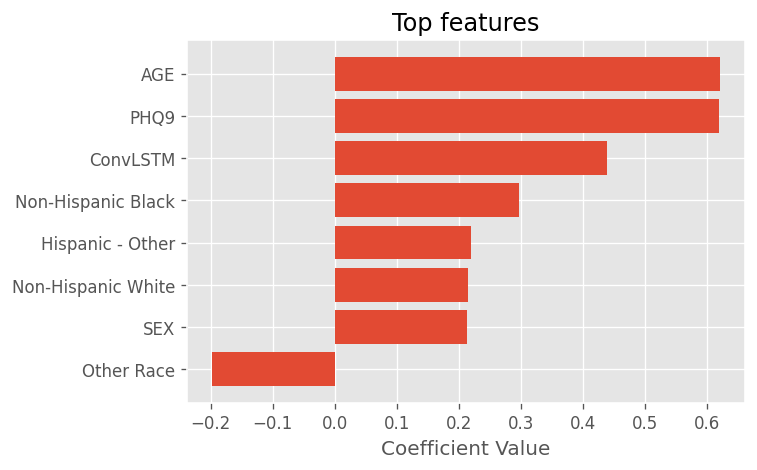

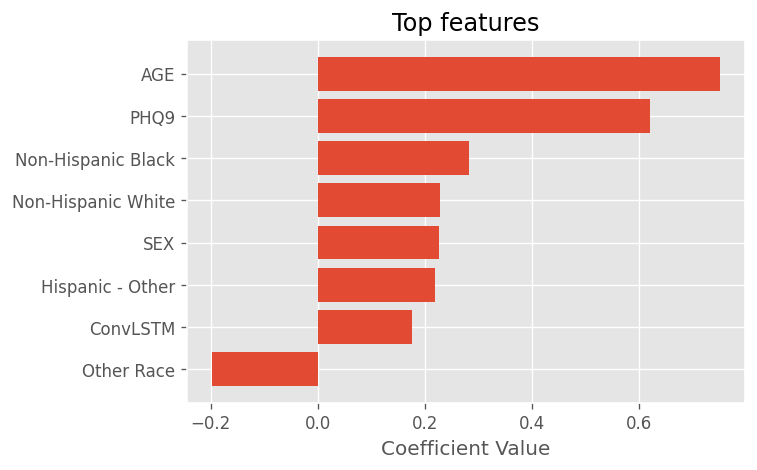

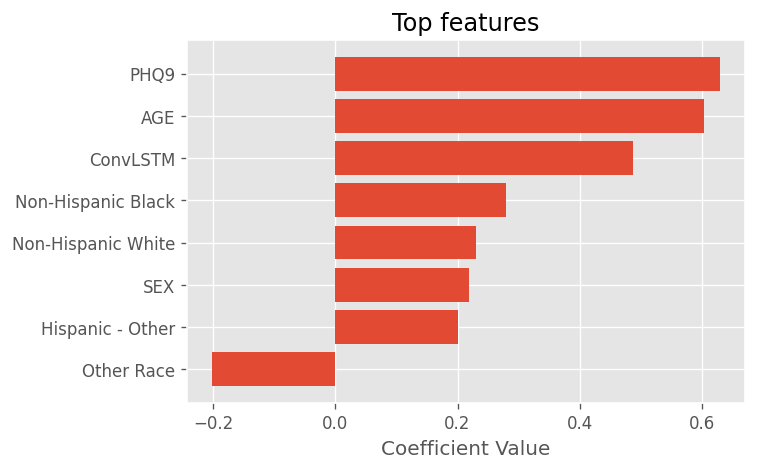

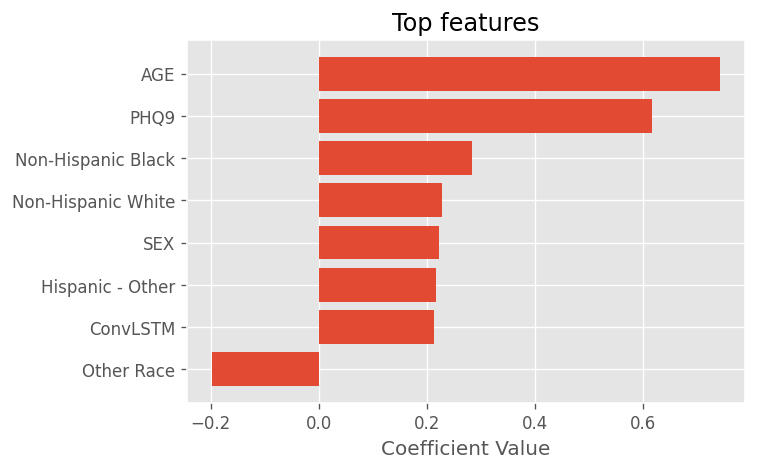

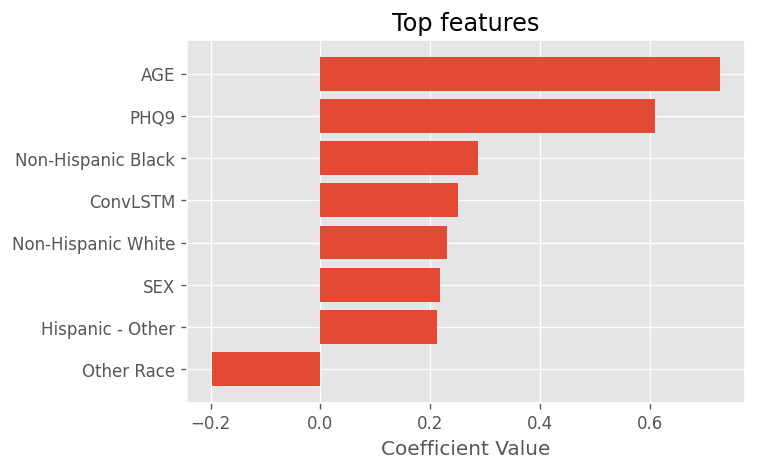

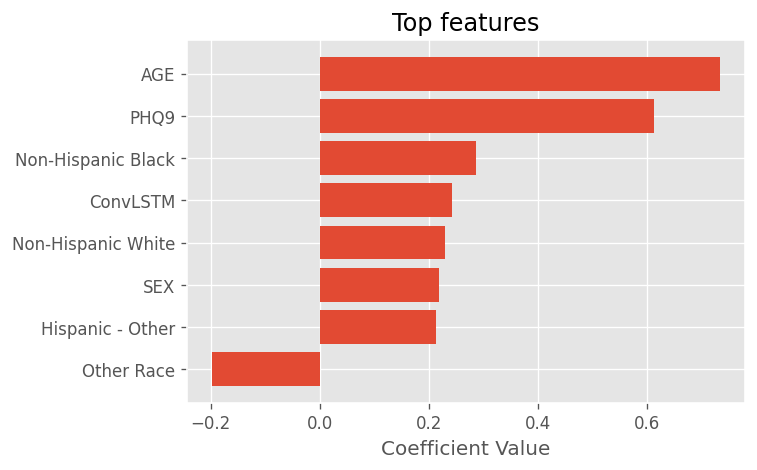

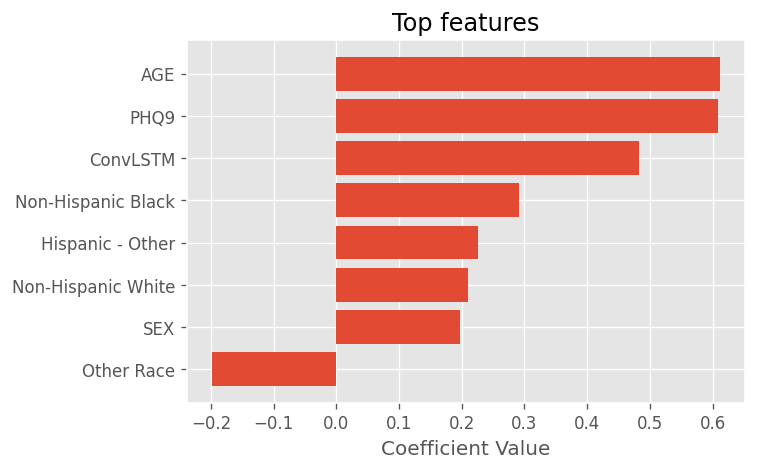

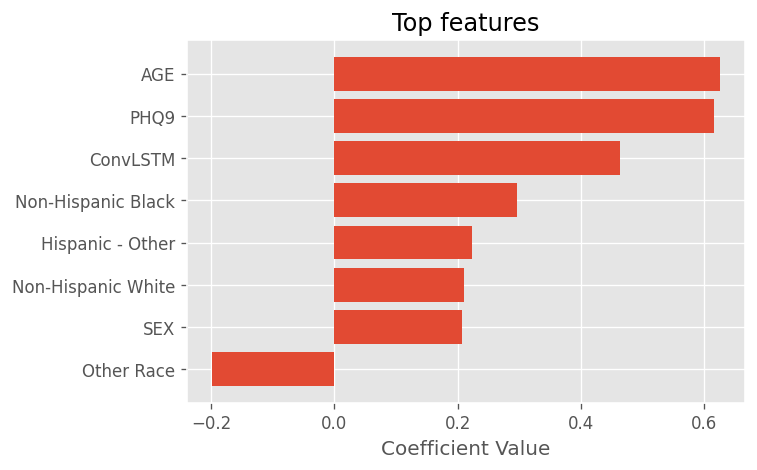

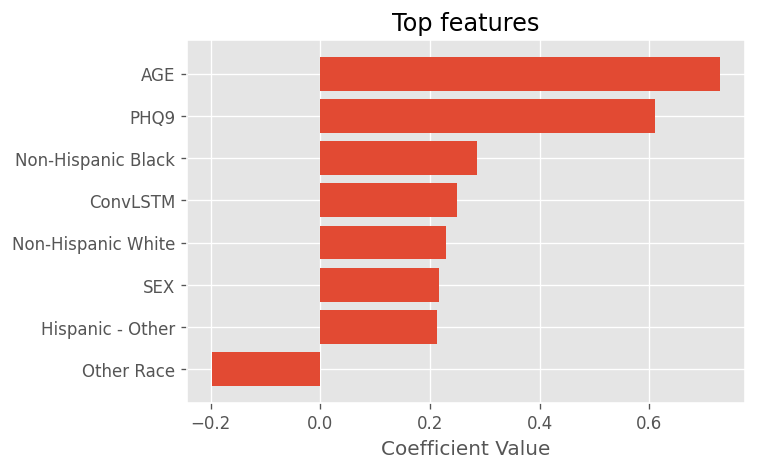

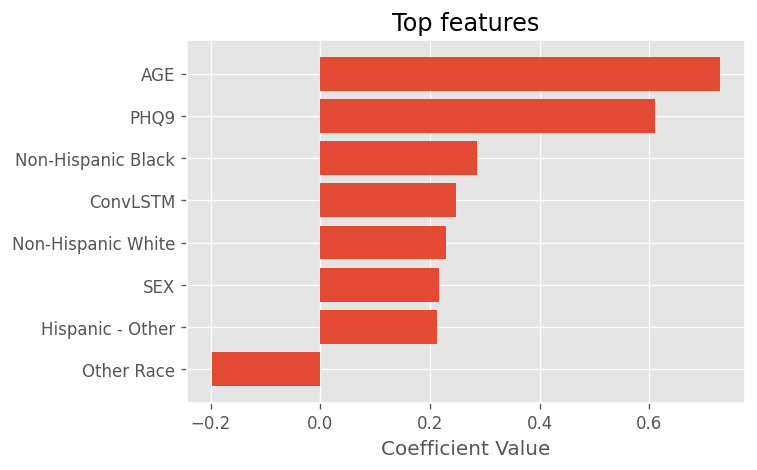

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

for i in range(10):
  X = pd.DataFrame(Xs[i], columns = ['ConvLSTM', "AGE", "SEX", "Hispanic - Mexican American", "Hispanic - Other", "Non-Hispanic Black", "Non-Hispanic White", "Other Race", "PHQ9"])
  X['y'] = y
  X = X.dropna(axis=0) # check if we ought to tchange to axis = 1
  sp_y = X['y'].to_numpy()
  X.drop(columns=['y'])
  X = X.to_numpy()

  scaler = MinMaxScaler()
  X = scaler.fit_transform(X)
  clf = LogisticRegression(random_state=0, class_weight='balanced', max_iter=10000).fit(X, sp_y)
  names = ['ConvLSTM', "AGE", "SEX", "Hispanic - Mexican American", "Hispanic - Other", "Non-Hispanic Black", "Non-Hispanic White", "Other Race", 'PHQ9']
  coef = clf.coef_[0]
  f_importances(coef, names,8)





